<a href="https://colab.research.google.com/github/shikha-aggarwal/machine_learning/blob/master/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uncomment to get data in your colab environment.
! git clone https://github.com/shikha-aggarwal/machine_learning.git

Cloning into 'machine_learning'...
remote: Enumerating objects: 8517, done.
remote: Counting objects: 100% (8517/8517), done.
remote: Compressing objects: 100% (8513/8513), done.
remote: Total 8517 (delta 0), reused 8517 (delta 0), pack-reused 0
Receiving objects: 100% (8517/8517), 242.66 MiB | 19.99 MiB/s, done.
Checking out files: 100% (8540/8540), done.


In [0]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import random

import matplotlib.pyplot as plt

See how to add your datasets to Colab: https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9

In [3]:
!ls

machine_learning  sample_data


In [4]:
!ls ./machine_learning/datasets/stock_data/Stocks/

aaap.us.txt	  dhr.us.txt	    jmlp.us.txt       quad.us.txt
aaba.us.txt	  dht.us.txt	    jmm.us.txt	      quik.us.txt
aac.us.txt	  dhvw.us.txt	    jmom.us.txt       qumu.us.txt
aal.us.txt	  dhxm.us.txt	    jmpb.us.txt       quot.us.txt
aamc.us.txt	  dhx.us.txt	    jmpc.us.txt       qure.us.txt
aame.us.txt	  dhy.us.txt	    jmp.us.txt	      q.us.txt
aan.us.txt	  dial.us.txt	    jmt.us.txt	      qval.us.txt
aaoi.us.txt	  diax.us.txt	    jmu.us.txt	      qvca.us.txt
aaon.us.txt	  din.us.txt	    jnce.us.txt       qvcb.us.txt
aapl.us.txt	  diod.us.txt	    jnj.us.txt	      qvm.us.txt
aap.us.txt	  disca.us.txt	    jnpr.us.txt       qxgg.us.txt
aat.us.txt	  discb.us.txt	    jnp.us.txt	      qxmi.us.txt
aa.us.txt	  disck.us.txt	    jobs.us.txt       qxrr.us.txt
aau.us.txt	  dish.us.txt	    job.us.txt	      qxtr.us.txt
aav.us.txt	  dis.us.txt	    joe.us.txt	      race.us.txt
aaww.us.txt	  dit.us.txt	    jof.us.txt	      rada.us.txt
aaxn.us.txt	  diva.us.txt	    jone.us.txt       rad.us.txt
abac.us

In [0]:
directory = './machine_learning/datasets/stock_data/Stocks/'

#file per company ticker - selecting tech companies for now
filenames = ['amzn.us.txt', 'msft.us.txt', 'goog.us.txt', 'googl.us.txt', 'fb.us.txt']

In [0]:
data = []
for filename in filenames:
  absolute_path = directory + filename
  df = pd.read_csv(absolute_path, sep=',')
  stock, _, _ = filename.split('.')
  df['Stock'] = stock
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].map(lambda x: x.year)
  data.append(df)

In [7]:
data[0].head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock,Year
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0,amzn,1997
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0,amzn,1997
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0,amzn,1997
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0,amzn,1997
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0,amzn,1997
5,1997-05-23,1.41,1.52,1.33,1.50,15937200,0,amzn,1997
6,1997-05-27,1.51,1.65,1.46,1.58,8697600,0,amzn,1997
7,1997-05-28,1.62,1.64,1.53,1.53,4574400,0,amzn,1997
8,1997-05-29,1.54,1.54,1.48,1.51,3472800,0,amzn,1997
9,1997-05-30,1.50,1.51,1.48,1.50,2594400,0,amzn,1997


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


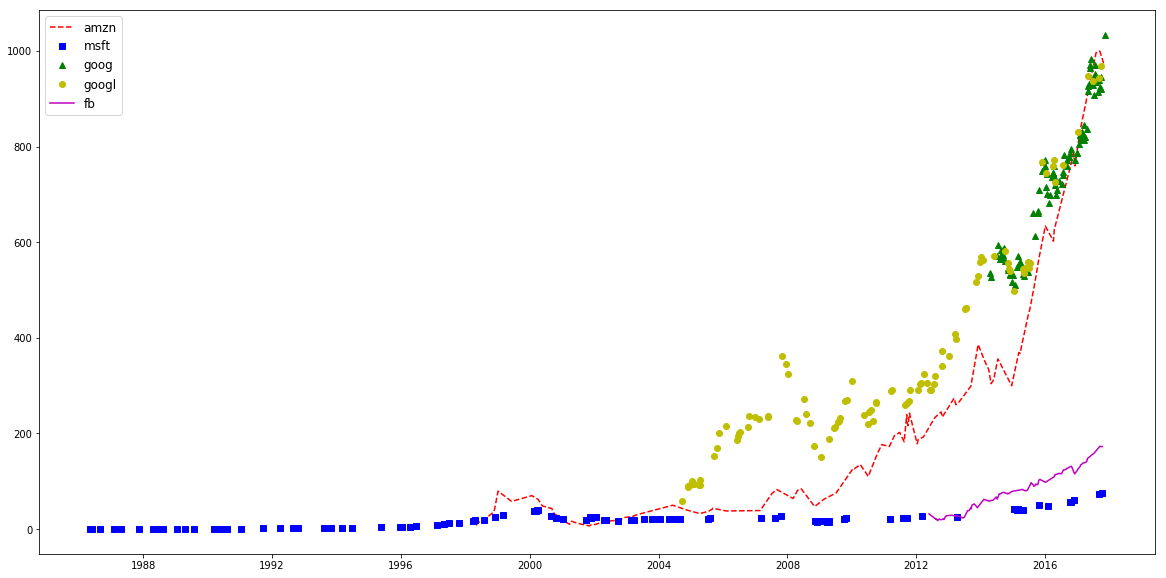

In [8]:
patterns = ['r--', 'bs', 'g^', 'yo', 'm-', 'c.']

plt.figure(figsize=(20, 10))
pattern_index = 0

for df in data:
  pattern = patterns[pattern_index]
  pattern_index += 1
  df = df.sample(n=100, replace=True)
  df = df.sort_values('Date')
  x=df['Date']
  y=df['Close']
  plt.plot(x, y, pattern, label=df['Stock'].iloc[0])
  plt.legend(loc='upper left', prop={'size': 12})

plt.show()

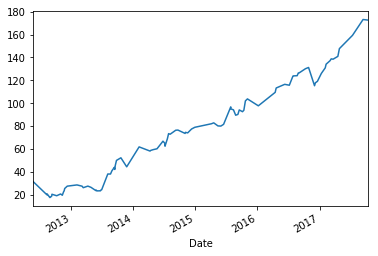

In [9]:
temp = df.copy()
temp.set_index('Date',inplace=True)
temp['Close'].plot()

In [10]:
train_data_by_stock = []
test_data_by_stock = []

for df in data:
  #divide data
  keep = np.random.randn(len(df)) < 0.81
  train = df[keep]
  test = df[~keep]
  train_data_by_stock.append(train)
  test_data_by_stock.append(test)
  print(len(df), len(train), len(test))

5153 4083 1070
7983 6333 1650
916 732 184
3333 2585 748
1381 1091 290


In [0]:
#Work with one stock for now
df = data[0]

#Split into train and test sets
keep = np.random.randn(len(df)) < 0.81
train = df[keep]
test = df[~keep]
train_data_by_stock.append(train)
test_data_by_stock.append(test)

train_data = train.drop(['Date','Stock', 'OpenInt', 'Year'], 1)
test_data = test.drop(['Date','Stock','OpenInt', 'Year'], 1)

#LSTM
window_len = 10

def prepare_lstm_model_data(data):
  LSTM_inputs = []

  for i in range(len(data)-window_len):
    input_set = data[i:(i+window_len)].copy()
    for col in list(input_set):
      #normalize each window using the first value
      input_set[col] = input_set[col]/input_set[col].iloc[0] - 1
    LSTM_inputs.append(input_set)

  #Output is normalized using the close price at beginning of the window period
  #todo(shikha): Play with it - see if it is better with the previous day close price
  LSTM_outputs = (data['Close'][window_len:].values/data['Close'][:-window_len].values)-1

  #convert to numpy arrays
  LSTM_inputs = [np.array(LSTM_input) for LSTM_input in LSTM_inputs]
  LSTM_inputs = np.array(LSTM_inputs)
  
  return LSTM_inputs, LSTM_outputs


LSTM_training_inputs, LSTM_training_outputs = prepare_lstm_model_data(train_data)

LSTM_testing_inputs, LSTM_testing_outputs = prepare_lstm_model_data(test_data)

In [13]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.10, loss="mae", optimizer="adam"):
  model = Sequential()

  model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_size))
  model.add(Activation(activ_func))

  model.compile(loss=loss, optimizer=optimizer)
  return model

Using TensorFlow backend.


In [14]:
# initialise model architecture
nn_model = build_model(LSTM_training_inputs, output_size=1, neurons = 32)

# model output is next price normalised to 10th previous closing price
# train model on data
nn_history = nn_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=5, batch_size=1, verbose=2, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 20s - loss: 0.0410
Epoch 2/5
 - 19s - loss: 0.0319
Epoch 3/5
 - 18s - loss: 0.0311
Epoch 4/5
 - 19s - loss: 0.0307
Epoch 5/5
 - 18s - loss: 0.0306


In [15]:
nn_history

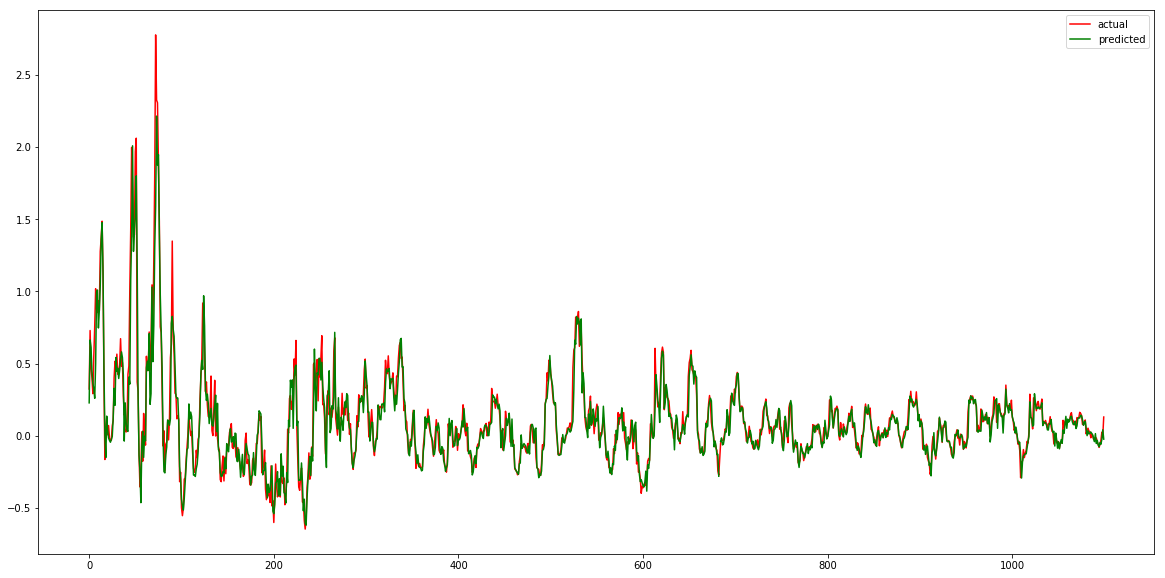

[ 0.32369942  0.72857143  0.46357616  0.4025974   0.29113924  0.54966887
  0.7539267   1.01746725  0.87982833  0.85321101  0.93449782  0.8677686
  1.2760181   1.37037037  1.48529412  1.11965812  0.39104478 -0.16450216
  0.04794521  0.12376238  0.00677201  0.07079646 -0.01590457 -0.03125
 -0.03155819  0.06854839  0.10515021  0.4015544   0.51633987  0.44493392
  0.56502242  0.42561983  0.44040404  0.48991935  0.67209776  0.48113208
  0.50679612  0.2754159   0.14367816  0.16310976  0.02578797  0.06376812
  0.42636746  0.48308525  1.00487211  1.42292994  1.99613402  1.7173913
  1.37437186  1.39187418  1.96787709  2.0599455   0.3726647   0.30565693
 -0.12636695 -0.35436383 -0.26795699  0.02773333 -0.17619048  0.15452055
  0.02729412 -0.06455922  0.55014327  0.45073375  0.47079277  0.71824104
  0.45417156  0.63051375  1.04431599  0.75794969  1.20659643  1.79200381
  2.77495379  2.32369942  2.30543735  1.91469194  1.48242424  0.75429663
  0.71410619  0.31533477 -0.07099855  0.03409478 -0.2440

ValueError: ignored

In [36]:
#How does it look?

from sklearn.metrics import mean_absolute_error

predicted_test_values_np = nn_model.predict(LSTM_testing_inputs)

predicted_test_values = []
for a in predicted_test_values_np:
  predicted_test_values.append(a[0])

plt.figure(figsize=(20, 10))
plt.plot(LSTM_testing_outputs, 'r', label = "actual")
plt.plot(predicted_test_values, 'g', label = "predicted")
plt.legend()
plt.show()

#MAE = mean_absolute_error(LSTM_testing_outputs, predicted_test_values)

print(LSTM_testing_outputs[:100])
print(predicted_test_values)
print(predicted_test_values[:100])
not_nan_indices = np.logical_not(np.logical_or(np.isnan(LSTM_testing_outputs), np.isnan(predicted_test_values)))
nan_indices = np.logical_or(np.isnan(LSTM_testing_outputs), np.isnan(predicted_test_values))
print(len(LSTM_testing_outputs))
print(len(predicted_test_values))
print(len(not_nan_indices))
print(len(nan_indices))

MAE = mean_absolute_error(LSTM_testing_outputs, predicted_test_values)

print('The Mean Absolute Error is: {}'.format(MAE))